In [11]:
from sklearn.datasets import load_digits

digits = load_digits()

In [ ]:
print(digits.DESCR)

In [9]:
digits.target.shape

(1797,)

In [13]:
digits.data.shape

(1797, 64)

In [14]:
digits.images.shape

(1797, 8, 8)

0


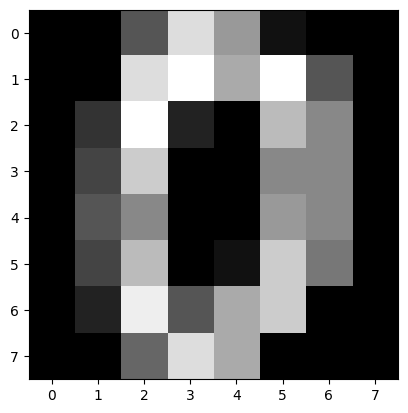

In [19]:

import matplotlib.pyplot as plt

x = digits.images[0]
print(digits.target[0])
plt.gray()
plt.imshow(x)
#plt.show()

# preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=.3)

x_train, x_test, y_train, y_test

In [ ]:
x_train[0]

In [23]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(0,1))

x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)
x_train[0]

array([0.        , 0.        , 0.        , 0.25      , 0.8125    ,
       1.        , 0.9375    , 0.13333333, 0.        , 0.        ,
       0.125     , 0.9375    , 0.8125    , 0.8125    , 1.        ,
       0.54545455, 0.        , 0.        , 0.4375    , 0.4375    ,
       0.        , 0.1875    , 1.        , 0.5       , 0.        ,
       0.        , 0.        , 0.25      , 0.25      , 0.5       ,
       0.93333333, 0.        , 0.        , 0.        , 0.875     ,
       1.        , 1.        , 1.        , 0.42857143, 0.        ,
       0.        , 0.        , 0.6875    , 0.5625    , 0.625     ,
       0.75      , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.8125    , 0.1875    , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.25      ,
       0.625     , 0.        , 0.        , 0.        ])

# Performance Metric

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)
    
    p = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    r = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted')

    print(f"acc train: {acc_train} - acc test: {acc_test} - precision: {p} - recall: {r}")

    return acc_train  , acc_test, p, r

# Classification

Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=128, n_estimators=256)

rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=128, n_estimators=256)

In [28]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf  , acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0 - acc test: 0.9722222222222222 - precision: 0.9724451876625789 - recall: 0.9722222222222222


SVM

In [30]:
from sklearn.svm import SVC 
svm = SVC(kernel='poly')

svm.fit(x_train, y_train)


SVC(kernel='poly')

In [31]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

# acc_train_svm, acc_test_svm, p_svm, r_svm


acc train: 1.0 - acc test: 0.9814814814814815 - precision: 0.98157129128685 - recall: 0.9814814814814815


ANN

In [35]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=1024, activation='relu', solver='adam', batch_size=64, learning_rate='constant' )
ann.fit(x_train, y_train)

MLPClassifier(batch_size=64, hidden_layer_sizes=1024)

In [36]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

# acc_train_ann, acc_test_ann, p_ann, r_ann


acc train: 1.0 - acc test: 0.975925925925926 - precision: 0.9763673971363409 - recall: 0.975925925925926


KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [38]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

# acc_train_knn, acc_test_knn, p_knn, r_knn


acc train: 0.9888623707239459 - acc test: 0.9814814814814815 - precision: 0.9816091344180948 - recall: 0.9814814814814815


# Comparison

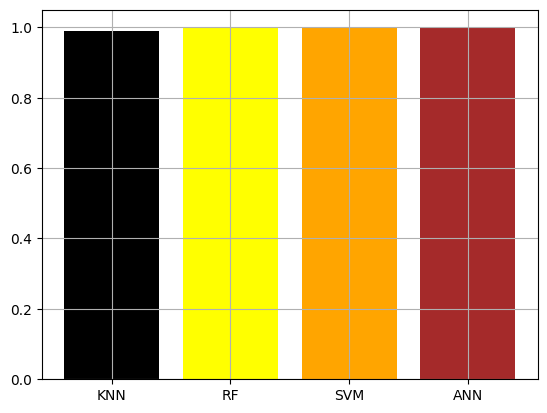

In [40]:
import matplotlib.pyplot as plt

acc_train =[acc_train_knn, acc_train_rf, acc_train_svm, acc_train_ann]
title=[ "KNN", "RF", "SVM", "ANN"]
colors=['black', 'yellow', 'orange', 'brown']
plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

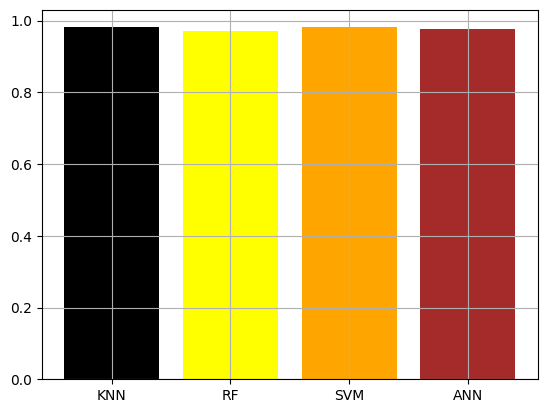

In [41]:
acc_train =[acc_test_knn, acc_test_rf, acc_test_svm, acc_test_ann]
title=[ "KNN", "RF", "SVM", "ANN"]
colors=['black', 'yellow', 'orange', 'brown']
plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

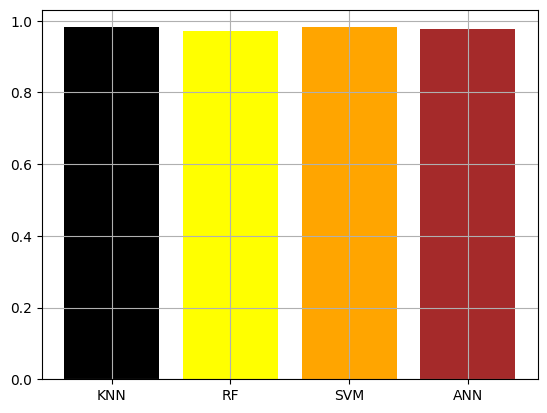

In [42]:
p =[ p_knn, p_rf, p_svm, p_ann]
title=[ "KNN", "RF", "SVM", "ANN"]
colors=['black', 'yellow', 'orange', 'brown']
plt.bar(title, p, color=colors)
plt.grid()
plt.show()

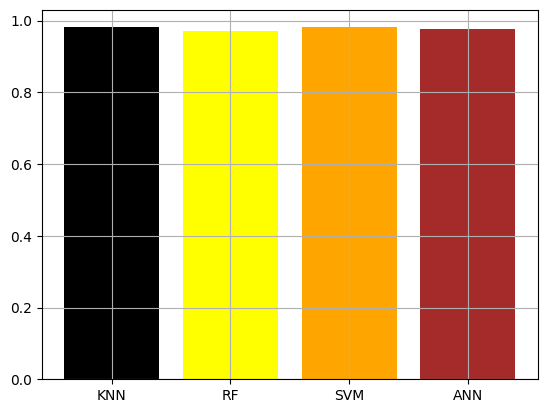

In [43]:
r =[ r_knn, r_rf, r_svm, r_ann]
title=[ "KNN", "RF", "SVM", "ANN"]
colors=['black', 'yellow', 'orange', 'brown']
plt.bar(title, r, color=colors)
plt.grid()
plt.show()